In [16]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import utm

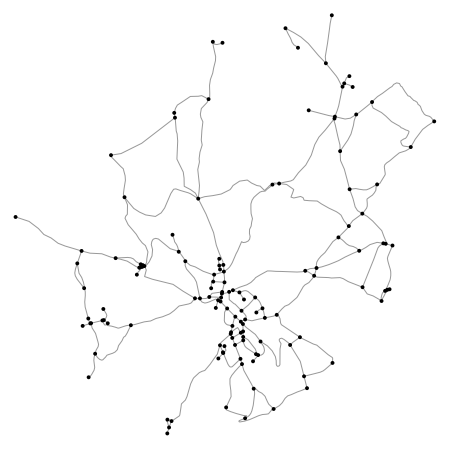

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
# get network from place name and create undirected graph

city = ox.graph.graph_from_place('Jonzieux',network_type='walk')
city = city.to_undirected()
city_projected = ox.project_graph(city).to_undirected()
ox.plot_graph(city_projected,bgcolor='white',node_color='black')

In [18]:
# eulerize and get circuit

city_eulerized = nx.eulerize(city)
circuit = list(nx.eulerian_circuit(city_eulerized))

In [19]:
# create plots from circuit (for animation)

nodes_projected = ox.graph_to_gdfs(city_projected,edges=False)
west,south,east,north = list(nodes_projected.total_bounds)
p = 500
bbox = north+p,south-p,east+p,west-p

node_container = []

for edge in circuit:
    node_container.extend(edge)
    subgraph = city_projected.subgraph(node_container)
    #fig,ax = ox.plot_graph(subgraph,bgcolor='white',node_color='black',bbox=bbox)

In [30]:
# get coordinates of path and total length

original_edges = ox.graph_to_gdfs(city,nodes=False)
lat_lon_path = []
total_length = 0

for edge in circuit:
    
    ids = [edge+(0,),edge[::-1]+(0,)]
    gdf_edge = original_edges[original_edges.index.isin(ids)]
    
    coords = list(gdf_edge['geometry'].values[0].coords)
    
    if len(lat_lon_path) == 0 or lat_lon_path[-1] == coords[0]:
        lat_lon_path.extend(coords)
        
    else:
        lat_lon_path.extend(coords[::-1])
     
    total_length += gdf_edge['length'].values[0]
    
lat_lon_path = [list(i)[::-1] for i in lat_lon_path]

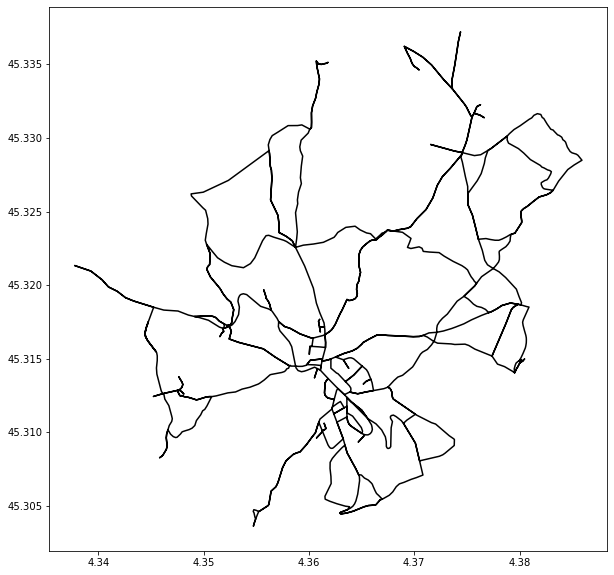

In [32]:
y = [y for y,x in lat_lon_path]
x = [x for y,x in lat_lon_path]

plt.figure(figsize=(10,10))

plt.plot(x,y,'black')

In [42]:
utm_coordinates = [utm.from_latlon(*point) for point in lat_lon_path]
print(utm_coordinates)
utm_coordinates = [list(point)[:2] for point in utm_coordinates]

[(343836.3787326624, 5257897.690916066, 32, 'T'), (343909.7613102109, 5257873.64962154, 32, 'T'), (343966.9987693031, 5257853.408798682, 32, 'T'), (343999.48053563153, 5257841.345260826, 32, 'T'), (344043.19726526056, 5257809.588210143, 32, 'T'), (344089.5208893024, 5257774.303581233, 32, 'T'), (344109.15975541284, 5257767.40884687, 32, 'T'), (344143.05886458734, 5257764.082725677, 32, 'T'), (344167.27892864525, 5257761.826026385, 32, 'T'), (344183.7009123564, 5257755.639865484, 32, 'T'), (343836.3787326624, 5257897.690916066, 32, 'T'), (343837.09947240446, 5257889.075323872, 32, 'T'), (343383.6009113882, 5258161.163030077, 32, 'T'), (343417.016886129, 5258143.799863768, 32, 'T'), (343419.3305804726, 5258142.603700932, 32, 'T'), (343435.5637941477, 5258123.208830071, 32, 'T'), (343452.35801638686, 5258107.869249258, 32, 'T'), (343477.8241942915, 5258095.00040331, 32, 'T'), (343522.0262585883, 5258071.700338087, 32, 'T'), (343577.8373602467, 5258042.218873223, 32, 'T'), (343613.52461271